In [1]:
# We import the dataset, libraries and functions from the functions draft
from functions_draft import *

## Generic Cleaning 

After having received the instructions from John, the first objective is to make a generic clean to our sharks attacks' database. 

### Removing Unnecessary Variables

We will start for removing columns whose variables are not of utility, so we check all variables and create the list containing the ones that we will get rid of. After, we pass the list as argument in the remove_columns function.

In [2]:
# list with all variables
attacks_variables = variables_list(attacks)
print(attacks_variables)

['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [3]:
# get index of "Investigator or Source"; the variables starting from there are not useful.
start_index = attacks_variables.index("Investigator or Source")
print(start_index)

14


In [4]:
# We define the list with the variables that we will remove from attacks dataframe.
variables_to_remove = attacks_variables[14:]
print(variables_to_remove)

['Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [5]:
# We apply the column_remover function.
column_remover(attacks, variables_to_remove) # put everything into a single function

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
attacks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


### Remove Duplicates and NaN rows

In [7]:
# Duplicated rows:
duplicates(attacks)

Sharks' dataset contains 19422 duplicated rows out of 25723.


There is a huge proportion of duplicated rows (mostly full of NaN's) in the dataset. In order to keep improving the reliability of the overall dataset and make our sample more representative, we will delete both duplicated and NaN rows, applying the drop_duplicates() method and dropna(), through the following functions.

We have just removed the unwanted variables that did not provide useful information for our 
research. Now let's get rid of duplicated rows and rows that only contain missing values, since they do not provide any relevant information to the research. 

In [8]:
# Function defined to get rid of NaN's
drop_all_nans (attacks)

In [9]:
# Function to drop duplicates
drop_dupl(attacks)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN


We have significantly changed the shape of our dataset, from roughly 25000x23 to 6300x14, and, most importantly, without losing any relevant information.

For now, let's see how much NaN's remain in the dataset and what is their distribution among the variables. Those with less missing values will be more representative and reliable for the study.

In [10]:
# With this code we get a series with the distribution of missing values for each variable
attacks.isna().sum()

Date              0
Year              2
Type              4
Country          50
Area            455
Location        540
Activity        544
Name            210
Sex             565
Age            2829
Injury           28
Fatal (Y/N)     539
Time           3352
Species        2837
dtype: int64

Text(0, 0.5, 'Missing Values Count')

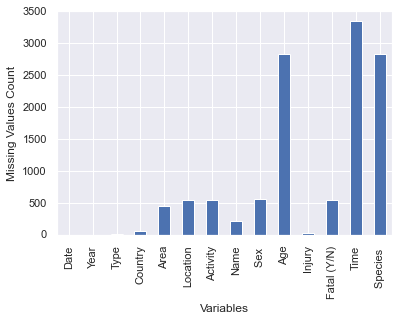

In [11]:
# To make it more visual, we plot it into a graph
attacks.isna().sum().plot(kind='bar')
plt.xlabel("Variables")
plt.ylabel("Missing Values Count")

From this barplot we observe that variables such as Country, Area and Location are almost complete, which is good news for our interests: the geographical perspective is very important to John. Also, Activity and Fatality are important aspects: we can evaluate the specific risk of surfing.

However, we also observe that time is the variable with more missing values. We'll see if we can get conclusions on that topic and evaluate how danger might change throughout the day.

To keep improving our knowledge on the file, we can check for the data types in each variable. It would be ideal to have the same datatype but it is possible that we find different expressions for a similar information. For example, age can be expressed through an integer (e.g. 45) or a string ("forty-five").

In [12]:
# We created a dictionary with variables as keys and a set containing datatypes as values.
df_datatypes(attacks)

Date only has one data type: {'str'}.
Year only has one data type: {'float64'}.
Type has 2 data types: {'str', 'float'}.
Country has 2 data types: {'str', 'float'}.
Area has 2 data types: {'str', 'float'}.
Location has 2 data types: {'str', 'float'}.
Activity has 2 data types: {'str', 'float'}.
Name has 2 data types: {'str', 'float'}.
Sex  has 2 data types: {'str', 'float'}.
Age has 2 data types: {'str', 'float'}.
Injury has 2 data types: {'str', 'float'}.
Fatal (Y/N) has 2 data types: {'str', 'float'}.
Time has 2 data types: {'str', 'float'}.
Species  has 2 data types: {'str', 'float'}.


{'Date': {'str'},
 'Year': {'float64'},
 'Type': {'float', 'str'},
 'Country': {'float', 'str'},
 'Area': {'float', 'str'},
 'Location': {'float', 'str'},
 'Activity': {'float', 'str'},
 'Name': {'float', 'str'},
 'Sex ': {'float', 'str'},
 'Age': {'float', 'str'},
 'Injury': {'float', 'str'},
 'Fatal (Y/N)': {'float', 'str'},
 'Time': {'float', 'str'},
 'Species ': {'float', 'str'}}

Most variables have instances with both strings and floats. We might take this into consideration when we take a deeper look in each variable in the specific cleaning.
So far, we have improved the organization of our dataset and made it more efficient. Now it is time to reshape it according to the specifications of the client, let's begin the specific cleaning.

## Specific Cleaning

The objective of the dataset is to provide John with a good surfing spot that fulfills his conditions. We keep the cleaning process of the dataset in order adapt it to meet those conditions.

### Country Column

The first step in this stage is to examine the Country column. We filter our dataset and work only with instances that occured in the United States (United States are mostly expressed as "USA" in the dataset).

In [13]:

country_attacks = attacks["Country"].value_counts()
print(f"The dataset has at least {country_attacks['USA']} attacks registered in the USA")

The dataset has at least 2228 attacks registered in the USA


However, we want to make sure that we don't miss any attack within US territory before creating a subset. We check for similar expressions to USA with regex.

In [14]:
attacks["Country"].str.contains(("united\sstates|usa|north\samerica"), case=False, flags=0, regex=True).value_counts()

False    4022
True     2228
Name: Country, dtype: int64

We do not find other expressions that might refer to USA, so we are all set to shrink our database to the 2228 rows corresponding to shark attacks at the USA.

In [15]:
attacks = attacks[(attacks['Country'] == "USA")]
attacks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"


### Area Column

In a similar process to the one undertaken with the Country variable, now we must filter again for the area. We only want to study 3 U.S. States: Florida, Hawaii and California.

In [16]:
florida_condition = (attacks['Area'] == "Florida")
california_condition = (attacks['Area'] == "California")
hawaii_condition = (attacks['Area'] == "Hawaii")

attacks = attacks[(florida_condition) | (california_condition) | (hawaii_condition)]

### Activity Column

Our scope of research lies on assessing risk for our surfer John. Hence, we will focus on the "Activity" column to filter only by surfing. In this case, by observing the data of the column, we see that there is a wide range of descriptions for activities. The principal ones are surfing, swimming and wading, but we also have other denominations such as "body boarding", "sitting on surfboard", windsurfing, "Surfing (sitting on his board)", etc. Although most descriptions are englobed in surfing, we will use a regular expression for the filter to keep all activities characterized for the use of a board.
 

Text(0, 0.5, 'Attacks')

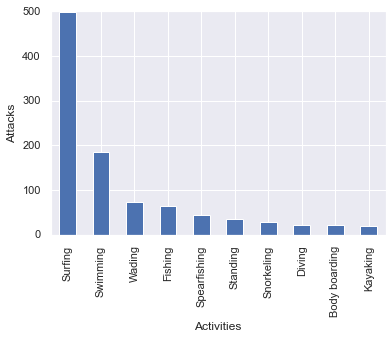

In [17]:
activities_attacks = attacks["Activity"].value_counts()
activities_attacks[:10].plot(kind="bar")
plt.xlabel("Activities")
plt.ylabel("Attacks")

In [18]:
# Make it applying function
pattern = "(?i)(surf|board)"
mask = attacks["Activity"].str.contains(pattern, na=False, regex=True)
attacks = attacks[mask]

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_1926/592587824.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = attacks["Activity"].str.contains(pattern, na=False, regex=True)


In [19]:
print(f"The dataframe is shrinking more and more, the actual number of rows is {attacks.shape[0]}.")

The dataframe is shrinking more and more, the actual number of rows is 706.


### Time Column

Time variable is relevant for our study since John loves to surf at afternoons. He enjoys a lot to finish the surfing session drinking some fruit shakes while watching the sunset. We have to check what is the time of the day that sharks are more active to ensure that afternoon practices are safe for John.

The times described in the dataframe respective column are mostly expressed in a format such as the following example: 13h00. There are other expressions such as Afternoon or Morning, but it is a minority that we will get rid of.

In [20]:
attacks["Time"] = attacks["Time"].apply(lambda x: (x.split("h")[0]) if(type(x) == str) and (len(x) == 5) and (x[:2].isdigit()) else None)


<AxesSubplot: >

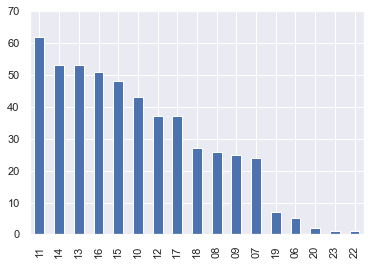

In [23]:
attacks["Time"].value_counts().plot(kind="bar")

We actually have a dataframe which contains data from shark attacks in the U.S. States of Florida, California and Hawaii, focusing only on those whose victims were doing activities with a common point, a board.



In [24]:
attacks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
Case Number,,,,,,,,,,,,,,
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07,NaN
2018.04.19,19-Apr-2018,2018.0,Unprovoked,USA,Hawaii,"Shipwrecks Beach, Keoneloa Bay, Kauai",Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N,None,6' shark
2018.03.31,31-Mar-2018,2018.0,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,N,09,"Tiger shark, 12'"
2017.12.31,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N,18,Tiger shark
2017.12.30,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N,12,NaN


In [26]:
attacks["Activity"].value_counts()

Surfing                                                499
Body boarding                                           21
Boogie boarding                                         14
Body surfing                                            13
Sitting on surfboard                                     7
                                                      ... 
Swimming / Body surfing                                  1
Standing / surfing                                       1
Standing alongside surfboard                             1
Surfing, fell off surfboard & stepped on the shark.      1
Kitesurfing                                              1
Name: Activity, Length: 112, dtype: int64